<a href="https://colab.research.google.com/github/aktuteja/DataMining_RetailIndustry/blob/main/Data_Analysis_ARIMA_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-2294ad2bd2ff>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:             Fuel_Price   No. Observations:                 8190
Model:                 ARIMA(5, 1, 0)   Log Likelihood                7333.896
Date:                Mon, 05 Dec 2022   AIC                         -14655.791
Time:                        21:48:07   BIC                         -14613.728
Sample:                             0   HQIC                        -14641.411
                               - 8190                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0793      0.013      6.244      0.000       0.054       0.104
ar.L2          0.0549      0.013      4.184      0.000       0.029       0.081
ar.L3      -5.245e-05      0.016     -0.003      0.9

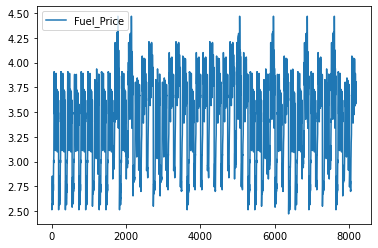

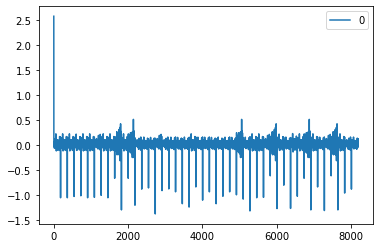

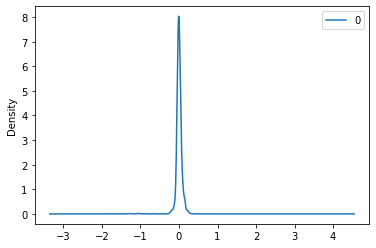

                 0
count  8190.000000
mean      0.000440
std       0.102819
min      -1.378945
25%      -0.029399
50%       0.000527
75%       0.034898
max       2.572000
predicted=3.215344, expected=3.256000
predicted=3.253817, expected=3.311000
predicted=3.313755, expected=3.407000
predicted=3.416320, expected=3.417000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.424776, expected=3.494000
predicted=3.506321, expected=3.571000
predicted=3.586651, expected=3.620000
predicted=3.628237, expected=3.638000
predicted=3.647151, expected=3.730000
predicted=3.744170, expected=3.717000
predicted=3.721284, expected=3.721000
predicted=3.722705, expected=3.666000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.665664, expected=3.617000
predicted=3.608172, expected=3.601000
predicted=3.597186, expected=3.594000
predicted=3.588696, expected=3.506000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.494505, expected=3.386000
predicted=3.370278, expected=3.314000
predicted=3.300816, expected=3.252000
predicted=3.236207, expected=3.211000
predicted=3.197518, expected=3.207000
predicted=3.201419, expected=3.198000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.193585, expected=3.168000
predicted=3.162947, expected=3.098000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.089991, expected=3.108000
predicted=3.105473, expected=3.161000
predicted=3.164004, expected=3.243000
predicted=3.249599, expected=3.237000
predicted=3.241694, expected=3.227000
predicted=3.229982, expected=3.244000
predicted=3.249444, expected=3.417000
predicted=3.433519, expected=3.475000
predicted=3.486990, expected=3.597000
predicted=3.615130, expected=3.711000
predicted=3.738037, expected=3.658000
predicted=3.660001, expected=3.622000
predicted=3.624562, expected=3.611000
predicted=3.612977, expected=3.606000
predicted=3.599986, expected=3.583000
predicted=3.578868, expected=3.529000
predicted=3.522415, expected=3.451000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.440602, expected=3.417000
predicted=3.408553, expected=3.386000
predicted=3.377534, expected=3.392000
predicted=3.387007, expected=3.454000


KeyboardInterrupt: ignored

In [5]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
#load dataset
series = read_csv("/content/drive/MyDrive/CIND830_Fall Semester/Features data set.csv")
series_new = series.filter(['Fuel_Price','Total Markdown'])

series_new.plot()

# split into train and test sets
X = series_new.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# fit model
model = ARIMA(series_new, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



<ipython-input-6-5d5d46e78984>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


   Store_x        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0        1  05/02/2010        42.31       2.572        NaN        NaN   
1        1  05/02/2010        42.31       2.572        NaN        NaN   
2        1  05/02/2010        42.31       2.572        NaN        NaN   
3        1  05/02/2010        42.31       2.572        NaN        NaN   
4        1  05/02/2010        42.31       2.572        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday_x  \
0        NaN        NaN        NaN  211.096358         8.106        False   
1        NaN        NaN        NaN  211.096358         8.106        False   
2        NaN        NaN        NaN  211.096358         8.106        False   
3        NaN        NaN        NaN  211.096358         8.106        False   
4        NaN        NaN        NaN  211.096358         8.106        False   

   Store_y  Dept  Weekly_Sales IsHoliday_y  
0      1.0   1.0      24924.50       False  
1      1

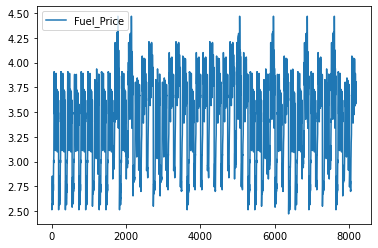

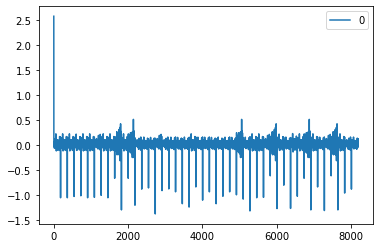

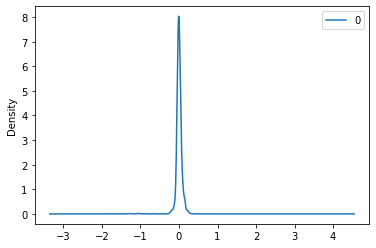

                 0
count  8190.000000
mean      0.000440
std       0.102819
min      -1.378945
25%      -0.029399
50%       0.000527
75%       0.034898
max       2.572000
predicted=3.215344, expected=3.256000
predicted=3.253817, expected=3.311000
predicted=3.313755, expected=3.407000
predicted=3.416320, expected=3.417000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.424776, expected=3.494000
predicted=3.506321, expected=3.571000
predicted=3.586651, expected=3.620000
predicted=3.628237, expected=3.638000
predicted=3.647151, expected=3.730000
predicted=3.744170, expected=3.717000
predicted=3.721284, expected=3.721000
predicted=3.722705, expected=3.666000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.665664, expected=3.617000
predicted=3.608172, expected=3.601000
predicted=3.597186, expected=3.594000
predicted=3.588696, expected=3.506000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.494505, expected=3.386000
predicted=3.370278, expected=3.314000
predicted=3.300816, expected=3.252000
predicted=3.236207, expected=3.211000
predicted=3.197518, expected=3.207000
predicted=3.201419, expected=3.198000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.193585, expected=3.168000
predicted=3.162947, expected=3.098000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.089991, expected=3.108000
predicted=3.105473, expected=3.161000
predicted=3.164004, expected=3.243000
predicted=3.249599, expected=3.237000
predicted=3.241694, expected=3.227000
predicted=3.229982, expected=3.244000
predicted=3.249444, expected=3.417000
predicted=3.433519, expected=3.475000
predicted=3.486990, expected=3.597000
predicted=3.615130, expected=3.711000
predicted=3.738037, expected=3.658000
predicted=3.660001, expected=3.622000
predicted=3.624562, expected=3.611000
predicted=3.612977, expected=3.606000
predicted=3.599986, expected=3.583000
predicted=3.578868, expected=3.529000
predicted=3.522415, expected=3.451000


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.440602, expected=3.417000
predicted=3.408553, expected=3.386000
predicted=3.377534, expected=3.392000
predicted=3.387007, expected=3.454000
predicted=3.459012, expected=3.494000
predicted=3.499050, expected=3.466000
predicted=3.466316, expected=3.439000
predicted=3.439399, expected=3.431000
predicted=3.430355, expected=3.479000
predicted=3.481006, expected=3.495000
predicted=3.497046, expected=3.422000


KeyboardInterrupt: ignored

In [6]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
#load dataset
features = read_csv("/content/drive/MyDrive/CIND830_Fall Semester/Features data set.csv")
sales = read_csv("/content/drive/MyDrive/CIND830_Fall Semester/sales data-set.csv")

new_df = pd.merge(features, sales, on='Date', how='outer')
print(new_df.head())
new_df["Total Markdown"] = new_df["MarkDown1"]+new_df["MarkDown2"]+new_df["MarkDown3"]+new_df["MarkDown4"]+new_df["MarkDown5"]
new_df["Total Markdown"] = new_df["Total Markdown"].fillna(0)
series_new = series.filter(['Fuel_Price','Total Markdown'])

series_new.plot()

# split into train and test sets
X = series_new.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# fit model
model = ARIMA(series_new, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

